# An Analysis on a GreyMarket on the Dark Web
    Loek van der Gugten 1975331
    Reinier de Ridder   1701134
    Frank Nijeboer      2011972

## Motivation and Goals
This document contains an analysis of items that are listed on a black market website. The black market website that has been analyzed is called ‘Grey Market’ according to the website ‘Darknet Markets Links’. On ‘Grey Market’ you can find a wide variety of items, ranging from drugs to accounts on online services, from software applications to bank accounts, etc. You can access this black market through the Tor browser. The link to ‘Grey Market’ only works in this browser.

There are multiple goals for performing this analysis, the first being understanding how the black market works. The idea is that by going through items on a black market we can get an overview of what kind of items are listed and how much information about the item and/or seller is provided per item. The second goal is to form an opinion about the legality of the items we find. It is very likely that we will encounter items that are considered illegal in  the Netherlands. However not every items necessarily is illegal. Therefore for each item we analyse, we indicate whether we think it is legal and thus, should we be in contact with the police, whether the police should further investigate the item and/or seller.



## Methodology
To do the analysis we decided to go through 100 items on the ‘Grey Market’ website by doing 33% each. For each item we listed details about the item such as the price and the seller. The results we wrote down and then analyzed to draw a conclusion. More about the results can be found below.

The first result consists of exactly 100 analyzations of items on the website ‘Grey Market’. All of the items we analyzed belonged to the category ‘Digital’. Three subcategories were explored: ‘Information’, ‘Fraud’ and ‘Software’. We chose around 33 items in each subcategory.

Per item we listed the following properties:
* Name
* Type of item according to ‘Grey Market’
* Quantity in which you buy it
* Price per Quantity in United States Dollars
* Account-name of the Seller,
* Where it will be shipped from
* Where it can be shipped to
* Whether or not we think it is legal (Yes if we think it is legal, Yes? if we think it is legal but are not sure (depends), and No if we think it is illegal)
* The subcategory the item belongs to
* How many pieces of the item are still in stock according to the seller.

All of this information can be found on the explore page or the page of the item on the Grey Market that was chosen by us.


## Data
Below the data that we have gathered can be found in the df variable.

In [1]:
from read_csv import df
df

,Name,Item,Quantity,$/Quantity,Seller,Shipping from,Shipping to,Legal,Category,In Stock
0,Amazon Carding Tutorial,eBook,1,5,topnotchdrugz,Worldwide,Worldwide,Yes?,Information/eBook,498.0
1,12 Ways To Rob A ATM Machine,eBook,1,3,topnotchdrugz,Worldwide,Worldwide,Yes?,Information/eBook,99.0
2,How to use socks 5,files,1,1,Hackyboy,Worldwide,Worldwide,Yes?,Information/Guides,999.0
3,Hdvpass.com Porn Premium Account Plus Warranty,accounts,1,3,enjoymyaccounts,Worldwide,Worldwide,No,Information/other,998.0
4,NORD VPN 6 Months Subscription + WARRANTY,accounts,1,3.2,pornseller,Worldwide,Worldwide,No,Information/other,999.0
...,...,...,...,...,...,...,...,...,...,...
95,22K BANK BALANCE! AUSTRALIAN BANK ACCOUNT!,accounts,1,199.00,brikzone123,Worldwide,Worldwide,No,Fraud,1.0
96,SSN Template PSD PERFECT EDIT!,files,1,32.97,Tactic,Worldwide,Worldwide,No,Fraud,15.0
97,APPLE ACCOUNTS AND CREDIT CARD FULL DATA. (OFFER),accounts,1,8.79,C4RD1NGC0D3,Worldwide,Worldwide,No,Fraud,10000.0
98,-AUSTRALIAN- BANK DROPS PRE-SET- READY TO USE,accounts,1,35.67,brikzone123,Worldwide,Worldwide,No,Fraud,30.0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Sellers
In all of our rows we also included the seller.
Blablabla #TODO Reinier

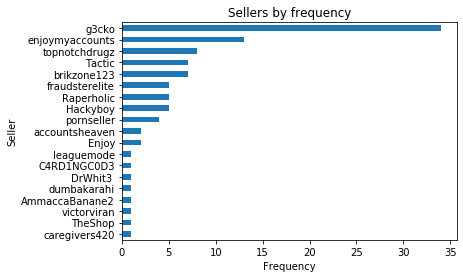

In [3]:
sellers_by_frequency = df["Seller"].value_counts()
sellers_by_frequency.sort_values().plot(kind='barh')
plt.title('Sellers by frequency')
plt.ylabel('Seller')
plt.xlabel('Frequency')
plt.show()

## Legality
The amount of legal advertisements were also included in our search on the grey market.


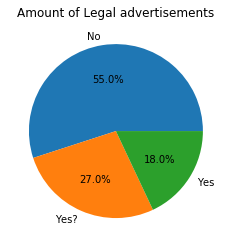

In [4]:
legal_amount = df["Legal"].value_counts()
legal_amount.plot.pie(autopct='%1.1f%%')
plt.title('Amount of Legal advertisements')
plt.ylabel('')
plt.show()

# TODO Frank

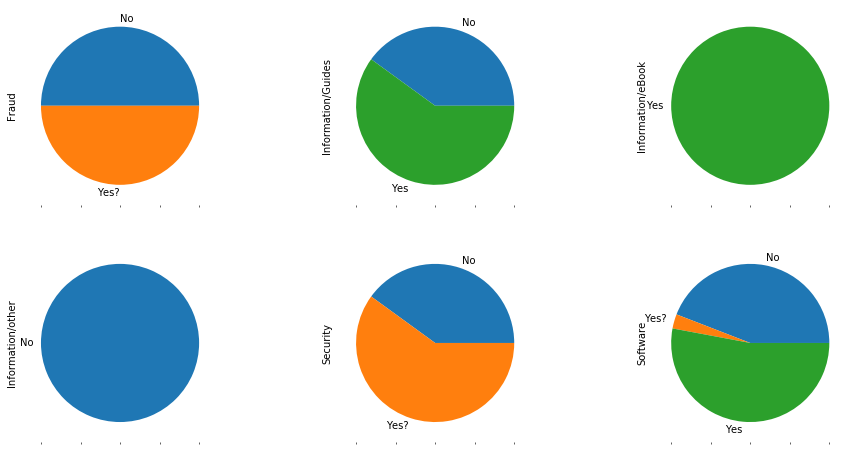

In [5]:
df.groupby(['Category', 'Legal']).size().unstack().transpose().plot(kind='pie', subplots=True, figsize=(16,8), layout=(2,3), legend=False, labels=['No', 'Yes?', 'Yes'])
plt.show()

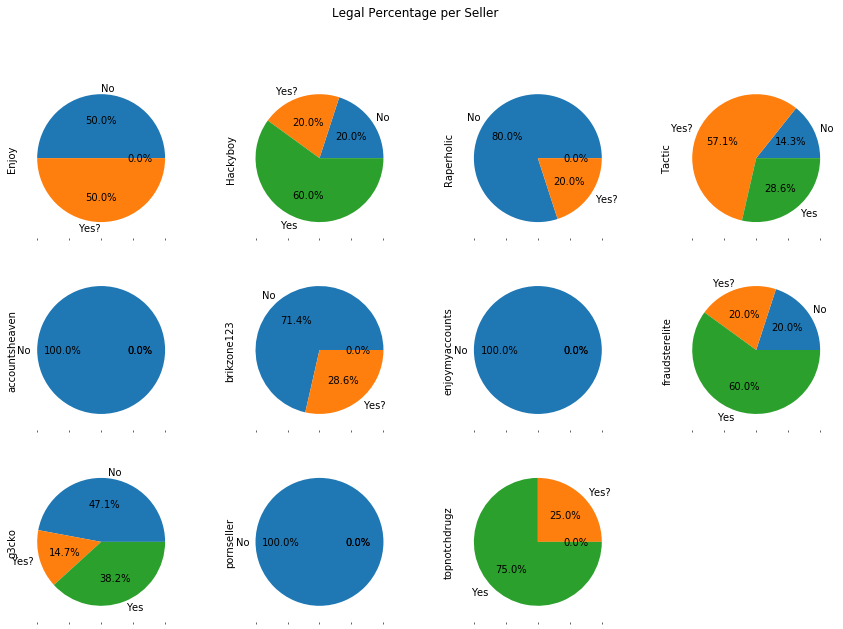

In [20]:
group = df.groupby(['Seller', 'Legal']).size().unstack()
group = group.fillna(0)
group = group[group.transpose().sum() > 1]
group.transpose().plot.pie(autopct='%.1f%%', subplots=True, figsize=(15,10), layout=(3,4), legend=False, labels=['No', 'Yes?', 'Yes'])
plt.suptitle('Legal Percentage per Seller')
plt.show()

In the image above
